# Import python package

In [109]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MeanShift

from pycaret.regression import setup, compare_models

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [110]:
second_df = pd.read_csv('/Users/tomleung/Downloads/Cardiovascular_Disease_Dataset.csv')
main_df = pd.read_csv('/Users/tomleung/Downloads/heart.csv')

In [111]:
main_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [112]:
second_df

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9949544,48,1,2,139,349,0,2,183,1,5.6,2,2,1
996,9953423,47,1,3,143,258,1,1,98,1,5.7,1,0,0
997,9965859,69,1,0,156,434,1,0,196,0,1.4,3,1,1
998,9988507,45,1,1,186,417,0,1,117,1,5.9,3,2,1


# Data Pre-Processing

In [113]:
# patientid is not necassary
second_df = second_df.drop('patientid', axis=1)

In [114]:
# rename the column of second_df
column_mapping = {
    "gender" : "sex",
    "chestpain" : "cp",
    "restingBP" : "trtbps",
    "serumcholestrol" : "chol",
    "fastingbloodsugar" : "fbs",
    "restingrelectro" : "restecg",
    "maxheartrate" : "thalachh",
    "exerciseangia" : "exng",
    "slope" : "slp",
    "noofmajorvessels" : "caa",
    "thal" : "thall",
    "target" : "output"
}
second_df = second_df.rename(columns=column_mapping)

In [115]:
second_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,output
0,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [116]:
# Merging the datasets
df = pd.concat([second_df, main_df], axis=0, join='outer', ignore_index=True)

In [117]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,output,thall
0,53,1,2,171,0,0,1,147,0,5.3,3,3,1,NaN
1,40,1,0,94,229,0,1,115,0,3.7,1,1,0,NaN
2,49,1,2,133,142,0,0,202,1,5.0,1,0,0,NaN
3,43,1,0,138,295,1,1,153,0,3.2,2,2,1,NaN
4,31,1,1,199,0,0,2,136,0,5.3,3,2,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,57,0,0,140,241,0,1,123,1,0.2,1,0,0,3.0
1299,45,1,3,110,264,0,1,132,0,1.2,1,0,0,3.0
1300,68,1,0,144,193,1,1,141,0,3.4,1,2,0,3.0
1301,57,1,0,130,131,0,1,115,1,1.2,1,1,0,3.0


In [118]:
# Removing outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

print(f"Original DataFrame shape: {df.shape}")

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"DataFrame shape after outlier removal: {df.shape}")

Original DataFrame shape: (1303, 14)
DataFrame shape after outlier removal: (1243, 14)


In [119]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,output,thall
1,40,1,0,94,229,0,1,115,0,3.7,1,1,0,NaN
2,49,1,2,133,142,0,0,202,1,5.0,1,0,0,NaN
3,43,1,0,138,295,1,1,153,0,3.2,2,2,1,NaN
6,79,1,2,130,240,0,2,157,0,2.5,2,1,1,NaN
7,52,1,0,127,345,0,0,192,1,4.9,1,0,0,NaN


In [120]:
df.shape
# check how many row of data

(1243, 14)

In [121]:
df.isnull().sum() 
#check any missing value

age           0
sex           0
cp            0
trtbps        0
chol          0
fbs           0
restecg       0
thalachh      0
exng          0
oldpeak       0
slp           0
caa           0
output        0
thall       942
dtype: int64

In [122]:
df.duplicated().sum()
# sum of duplicate data

1

In [123]:
df.drop_duplicates(keep='first',inplace=True)
# remove duplicate data

In [124]:
# predict the missing values 
thal_present = df[df['thall'].notnull()]
thal_missing = df[df['thall'].isnull()]

X = thal_present.drop('thall', axis=1)
y = thal_present['thall']

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [125]:
# Replace missing 'thal' values with the predicted values
thal_missing_imputed = imputer.transform(thal_missing.drop('thall', axis=1))

thal_predicted = model.predict(thal_missing_imputed)

thal_predicted_rounded = thal_predicted.round(3)

df.loc[df['thall'].isnull(), 'thall'] = thal_predicted_rounded

In [126]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,output,thall
1,40,1,0,94,229,0,1,115,0,3.7,1,1,0,2.421
2,49,1,2,133,142,0,0,202,1,5.0,1,0,0,2.634
3,43,1,0,138,295,1,1,153,0,3.2,2,2,1,2.302
6,79,1,2,130,240,0,2,157,0,2.5,2,1,1,2.449
7,52,1,0,127,345,0,0,192,1,4.9,1,0,0,2.854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,57,0,0,140,241,0,1,123,1,0.2,1,0,0,3.000
1299,45,1,3,110,264,0,1,132,0,1.2,1,0,0,3.000
1300,68,1,0,144,193,1,1,141,0,3.4,1,2,0,3.000
1301,57,1,0,130,131,0,1,115,1,1.2,1,1,0,3.000


In [127]:
df.describe()
# show statistical data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,output,thall
count,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000,1242.00000,1242.000000,1242.000000,1242.000000
mean,50.538647,0.743961,0.966989,146.315620,307.941224,0.271337,0.679549,146.066828,0.460548,2.301771,1.47504,1.086151,0.551530,2.415221
std,16.357672,0.436619,0.976619,28.826446,106.238336,0.444828,0.719511,32.148069,0.498642,1.741288,0.92930,1.005938,0.497538,0.339775
min,20.000000,0.000000,0.000000,94.000000,85.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000
25%,38.000000,0.000000,0.000000,126.000000,231.250000,0.000000,0.000000,124.000000,0.000000,0.800000,1.00000,0.000000,0.000000,2.210000
50%,52.000000,1.000000,1.000000,140.000000,287.000000,0.000000,1.000000,148.000000,0.000000,2.000000,1.00000,1.000000,1.000000,2.441500
75%,63.000000,1.000000,2.000000,170.000000,368.000000,1.000000,1.000000,172.000000,1.000000,3.500000,2.00000,2.000000,1.000000,2.608750
max,80.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.00000,4.000000,1.000000,3.014000


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1242 entries, 1 to 1302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1242 non-null   int64  
 1   sex       1242 non-null   int64  
 2   cp        1242 non-null   int64  
 3   trtbps    1242 non-null   int64  
 4   chol      1242 non-null   int64  
 5   fbs       1242 non-null   int64  
 6   restecg   1242 non-null   int64  
 7   thalachh  1242 non-null   int64  
 8   exng      1242 non-null   int64  
 9   oldpeak   1242 non-null   float64
 10  slp       1242 non-null   int64  
 11  caa       1242 non-null   int64  
 12  output    1242 non-null   int64  
 13  thall     1242 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 145.5 KB


# Association Rule Mining

## Data Description
age - age in years

sex - sex (1 = male; 0 = female)

cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 = asymptomatic)

trestbps - resting blood pressure (in mm Hg on admission to the hospital)

chol - serum cholestoral in mg/dl

fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

restecg - resting electrocardiographic results (1 = normal; 2 = having ST-T wave abnormality; 0 = hypertrophy)

thalach - maximum heart rate achieved

exang - exercise induced angina (1 = yes; 0 = no)

oldpeak - ST depression induced by exercise relative to rest

slope - the slope of the peak exercise ST segment (2 = upsloping; 1 = flat; 0 = downsloping)

ca - number of major vessels (0-3) colored by flourosopy

thal - 2 = normal; 1 = fixed defect; 3 = reversable defect

num - the predicted attribute - diagnosis of heart disease (angiographic disease status) (Value 0 = < diameter narrowing; Value 1 = > 50% diameter narrowing)

In [129]:
df_arm = df.copy()
# Binning age into categories
df_arm['age'] = pd.cut(df['age'], bins=[0, 20, 40, 60, 100], labels=['0_To_20', '21_To_40','41_To_60', '60_above'])
df_arm['sex'] = pd.cut(df['sex'], bins=[-1, 0, 1], labels=['Female', 'Male'])
df_arm['cp'] = pd.cut(df['cp'], bins=[-1, 0, 1, 2, 3], labels=['asymptomatic', 'typical_angina', 'atypical_angina', 'non-anginal_pain'])
df_arm['thall'] = pd.cut(df['thall'], bins=[0, 1, 2, 3], labels=['fixed_defect', 'thal_normal', 'reversable_defect'])
df_arm['fbs'] = pd.cut(df['fbs'], bins=[-1, 0, 1], labels=['fasting_blood_sugar<=120 mg/dl', 'fasting_blood_sugar>120_mg/dl'])
df_arm['restecg'] = pd.cut(df['restecg'], bins=[-1, 0, 1, 2], labels=['hypertrophy', 'normal', 'having_ST-T_wave_abnormality'])
df_arm['exng'] = pd.cut(df['exng'], bins=[-1, 0, 1], labels=['not_exercise_induced_angina', 'exercise_induced_angina'])

df_arm['trtbps'] = pd.cut(df['trtbps'], 3, labels=['low_bp', 'medium_bp', 'high_bp'])
df_arm['chol'] = pd.cut(df['chol'], 3, labels=['low_chol', 'medium_chol', 'high_chol'])
df_arm['thalachh'] = pd.cut(df['thalachh'], 3, labels=['low_hr', 'medium_hr', 'high_hr'])
df_arm['oldpeak'] = pd.cut(df['oldpeak'], 3, labels=['low_op', 'medium_op', 'high_op'])
df_arm['output'] = pd.cut(df['output'], bins=[-1, 0, 1], labels=['more_chance_of_heart_attack', 'less_chance_of_heart_attack'])
df_arm

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,output,thall
1,21_To_40,Male,asymptomatic,low_bp,low_chol,fasting_blood_sugar<=120 mg/dl,normal,medium_hr,not_exercise_induced_angina,medium_op,1,1,more_chance_of_heart_attack,reversable_defect
2,41_To_60,Male,atypical_angina,medium_bp,low_chol,fasting_blood_sugar<=120 mg/dl,hypertrophy,high_hr,exercise_induced_angina,high_op,1,0,more_chance_of_heart_attack,reversable_defect
3,41_To_60,Male,asymptomatic,medium_bp,medium_chol,fasting_blood_sugar>120_mg/dl,normal,medium_hr,not_exercise_induced_angina,medium_op,2,2,less_chance_of_heart_attack,reversable_defect
6,60_above,Male,atypical_angina,medium_bp,low_chol,fasting_blood_sugar<=120 mg/dl,having_ST-T_wave_abnormality,medium_hr,not_exercise_induced_angina,medium_op,2,1,less_chance_of_heart_attack,reversable_defect
7,41_To_60,Male,asymptomatic,low_bp,medium_chol,fasting_blood_sugar<=120 mg/dl,hypertrophy,high_hr,exercise_induced_angina,high_op,1,0,more_chance_of_heart_attack,reversable_defect
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,41_To_60,Female,asymptomatic,medium_bp,low_chol,fasting_blood_sugar<=120 mg/dl,normal,medium_hr,exercise_induced_angina,low_op,1,0,more_chance_of_heart_attack,reversable_defect
1299,41_To_60,Male,non-anginal_pain,low_bp,medium_chol,fasting_blood_sugar<=120 mg/dl,normal,medium_hr,not_exercise_induced_angina,low_op,1,0,more_chance_of_heart_attack,reversable_defect
1300,60_above,Male,asymptomatic,medium_bp,low_chol,fasting_blood_sugar>120_mg/dl,normal,medium_hr,not_exercise_induced_angina,medium_op,1,2,more_chance_of_heart_attack,reversable_defect
1301,41_To_60,Male,asymptomatic,medium_bp,low_chol,fasting_blood_sugar<=120 mg/dl,normal,medium_hr,exercise_induced_angina,low_op,1,1,more_chance_of_heart_attack,reversable_defect


In [130]:
# rename all of value name, make the value clearly, allow easy to understand
def rename_values(df):
    for col in df.columns:
        if col not in ['Unnamed', 'thall']:
            df[col] = df[col].apply(lambda x: f"{col}_{str(x)}" if pd.notnull(x) else x)
    return df

data_categorical = rename_values(df_arm)
data_categorical.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,output,thall
1,age_21_To_40,sex_Male,cp_asymptomatic,trtbps_low_bp,chol_low_chol,fbs_fasting_blood_sugar<=120 mg/dl,restecg_normal,thalachh_medium_hr,exng_not_exercise_induced_angina,oldpeak_medium_op,slp_1,caa_1,output_more_chance_of_heart_attack,reversable_defect
2,age_41_To_60,sex_Male,cp_atypical_angina,trtbps_medium_bp,chol_low_chol,fbs_fasting_blood_sugar<=120 mg/dl,restecg_hypertrophy,thalachh_high_hr,exng_exercise_induced_angina,oldpeak_high_op,slp_1,caa_0,output_more_chance_of_heart_attack,reversable_defect
3,age_41_To_60,sex_Male,cp_asymptomatic,trtbps_medium_bp,chol_medium_chol,fbs_fasting_blood_sugar>120_mg/dl,restecg_normal,thalachh_medium_hr,exng_not_exercise_induced_angina,oldpeak_medium_op,slp_2,caa_2,output_less_chance_of_heart_attack,reversable_defect
6,age_60_above,sex_Male,cp_atypical_angina,trtbps_medium_bp,chol_low_chol,fbs_fasting_blood_sugar<=120 mg/dl,restecg_having_ST-T_wave_abnormality,thalachh_medium_hr,exng_not_exercise_induced_angina,oldpeak_medium_op,slp_2,caa_1,output_less_chance_of_heart_attack,reversable_defect
7,age_41_To_60,sex_Male,cp_asymptomatic,trtbps_low_bp,chol_medium_chol,fbs_fasting_blood_sugar<=120 mg/dl,restecg_hypertrophy,thalachh_high_hr,exng_exercise_induced_angina,oldpeak_high_op,slp_1,caa_0,output_more_chance_of_heart_attack,reversable_defect


In [131]:
data_asso_rule = data_categorical.copy()
data_asso_rule = data_asso_rule.astype(str)
data_asso_rule = data_asso_rule.values.tolist()
# Create TransactionEncoder object
te = TransactionEncoder()

# Perform One-hot encoding
te_ary = te.fit_transform(data_asso_rule)

# Convert the sparse matrix to a dense array
data6 = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(data6, min_support=0.3, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.4)

filtered_rules = rules[rules['consequents'].astype(str).str.contains("|".join(['output_more_chance_of_heart_attack', 'output_less_chance_of_heart_attack']))]

bundles = []
for index, row in filtered_rules.iterrows():
    antecedents = ', '.join(list(row['antecedents']))
    consequents = ', '.join(list(row['consequents']))
    support = row['support']
    confidence = row['confidence']
    lift = row['lift']
    bundle = f"{antecedents} --> {consequents} [Support: {support:.3f}, Confidence: {confidence:.3f}, Lift: {lift:.3f}]"
    bundles.append(bundle)

# Print each bundle
for bundle in bundles:
    print(bundle)

cp_asymptomatic --> output_more_chance_of_heart_attack [Support: 0.334, Confidence: 0.759, Lift: 1.692]
exng_not_exercise_induced_angina --> output_less_chance_of_heart_attack [Support: 0.328, Confidence: 0.607, Lift: 1.101]
fbs_fasting_blood_sugar<=120 mg/dl --> output_less_chance_of_heart_attack [Support: 0.342, Confidence: 0.470, Lift: 0.851]
fbs_fasting_blood_sugar<=120 mg/dl --> output_more_chance_of_heart_attack [Support: 0.386, Confidence: 0.530, Lift: 1.183]
reversable_defect --> output_less_chance_of_heart_attack [Support: 0.431, Confidence: 0.513, Lift: 0.931]
sex_Male --> output_less_chance_of_heart_attack [Support: 0.397, Confidence: 0.534, Lift: 0.967]
slp_2 --> output_less_chance_of_heart_attack [Support: 0.309, Confidence: 0.891, Lift: 1.615]
reversable_defect --> output_more_chance_of_heart_attack [Support: 0.408, Confidence: 0.487, Lift: 1.085]
sex_Male --> output_more_chance_of_heart_attack [Support: 0.347, Confidence: 0.466, Lift: 1.040]
cp_asymptomatic, reversable_d

## Data Visualization

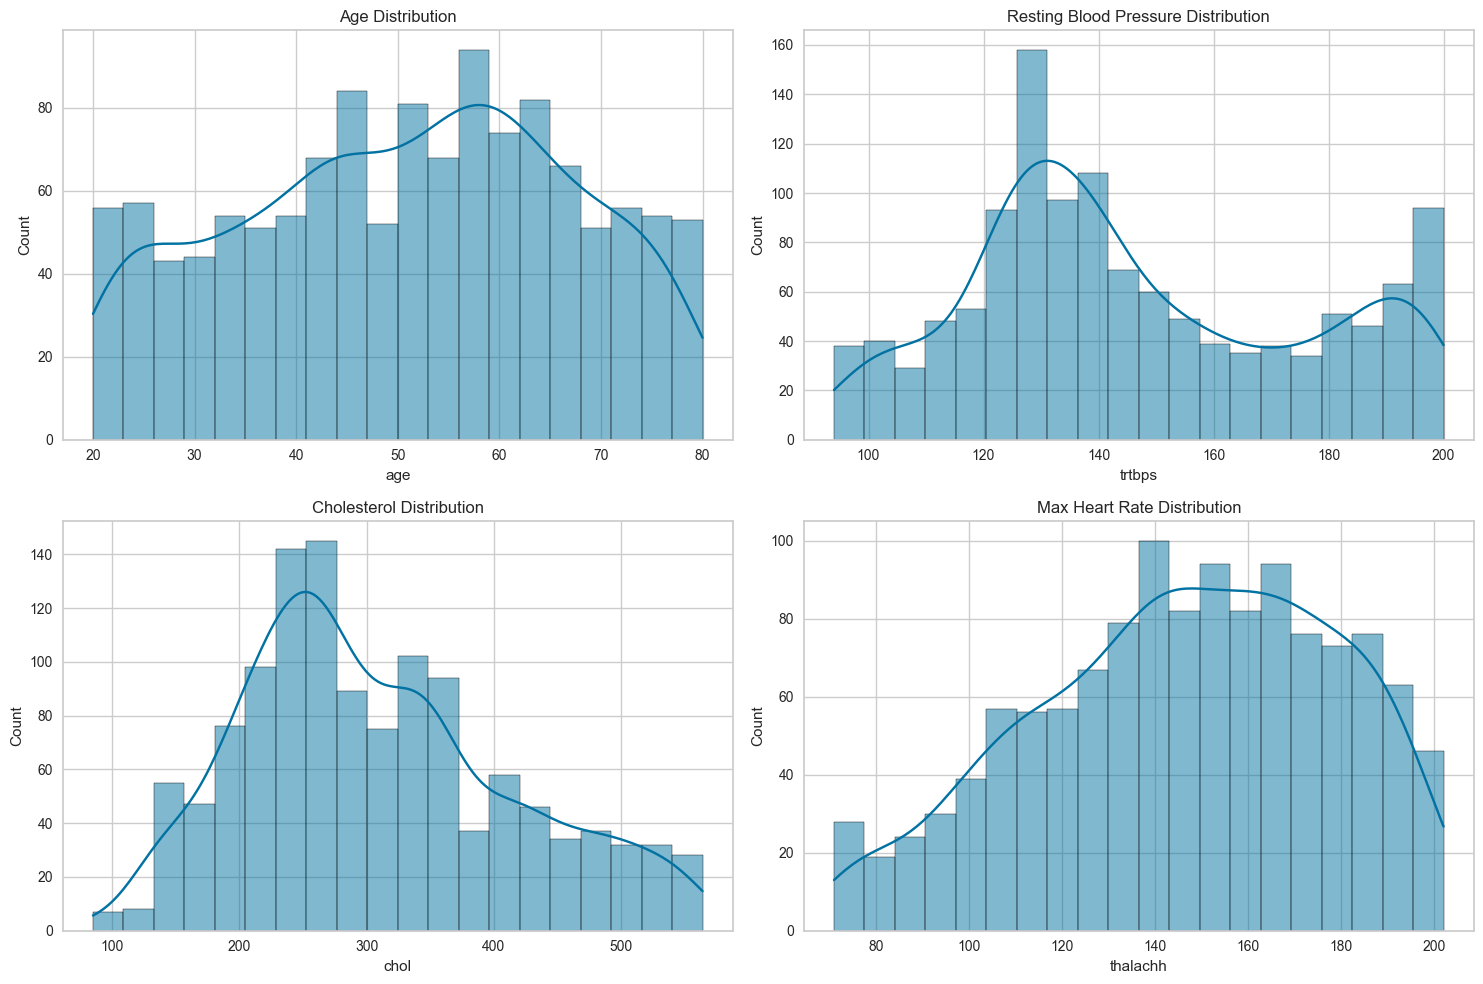

In [132]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(df['age'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

sns.histplot(df['trtbps'], bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Resting Blood Pressure Distribution')

sns.histplot(df['chol'], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Cholesterol Distribution')

sns.histplot(df['thalachh'], bins=20, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Max Heart Rate Distribution')

plt.tight_layout()
plt.show()

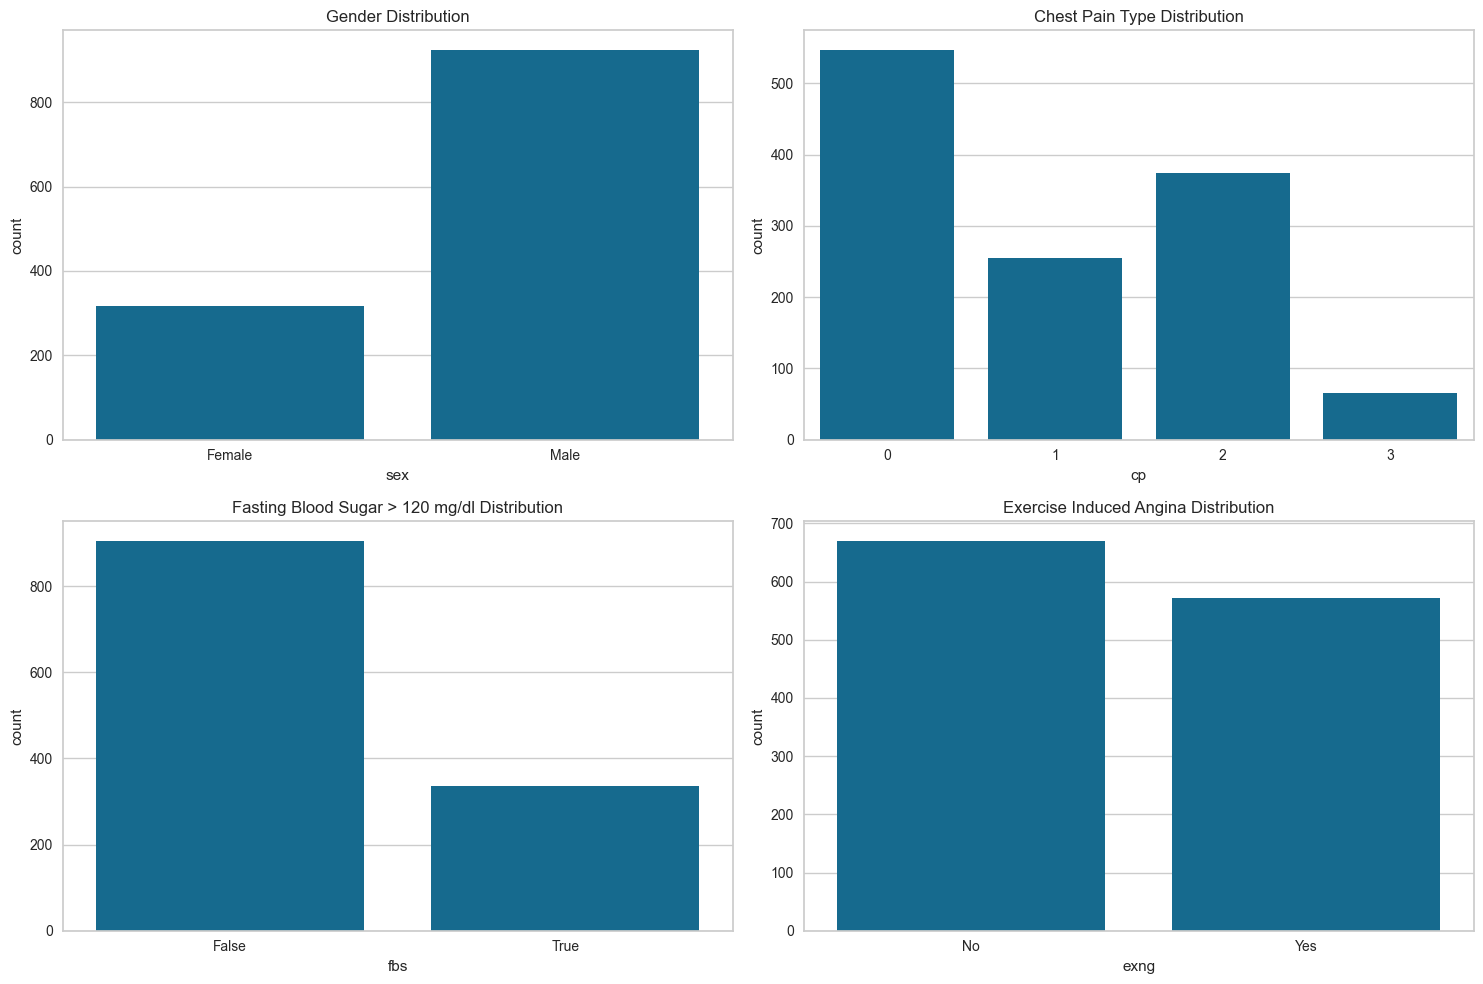

In [133]:
# categorical variables
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.countplot(x='sex', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Gender Distribution')
axes[0, 0].set_xticklabels(['Female', 'Male'])

sns.countplot(x='cp', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Chest Pain Type Distribution')

sns.countplot(x='fbs', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Fasting Blood Sugar > 120 mg/dl Distribution')
axes[1, 0].set_xticklabels(['False', 'True'])

sns.countplot(x='exng', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Exercise Induced Angina Distribution')
axes[1, 1].set_xticklabels(['No', 'Yes'])

plt.tight_layout()
plt.show()


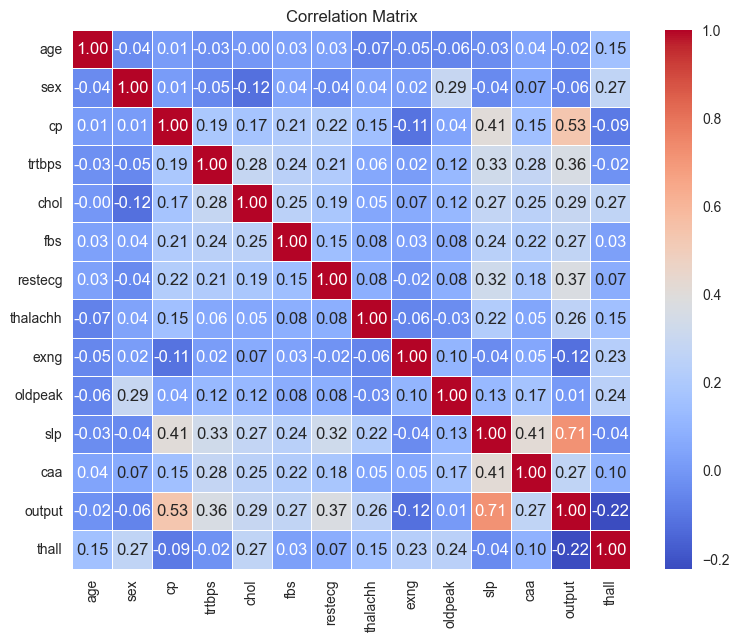

In [134]:
# Creating a heatmap to visualize the correlation between variables
plt.figure(figsize=(9, 7))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

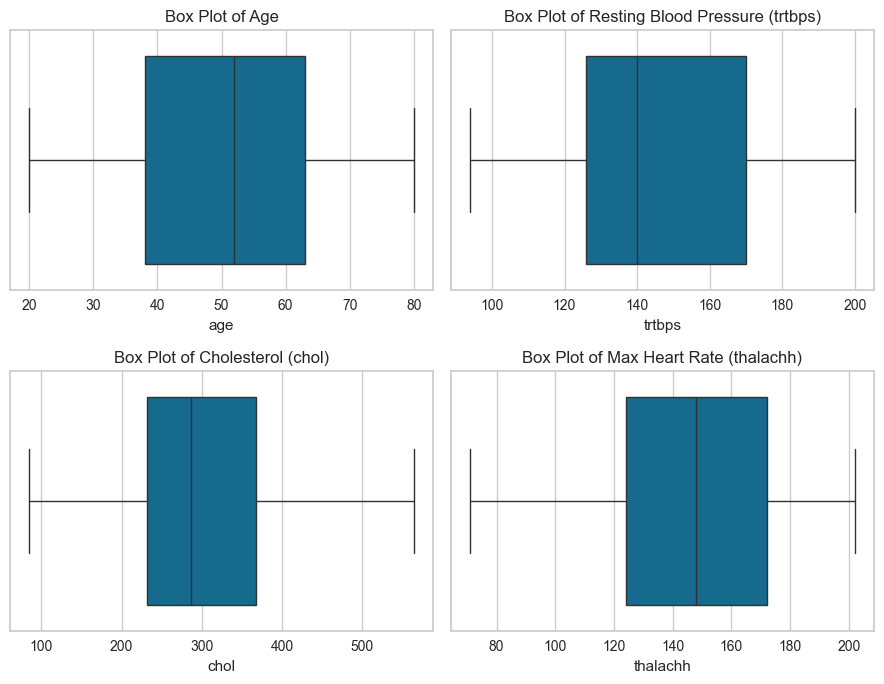

In [135]:
# show data distributions
fig, axes = plt.subplots(2, 2, figsize=(9, 7))

sns.boxplot(x=df['age'], ax=axes[0, 0])
axes[0, 0].set_title('Box Plot of Age')

sns.boxplot(x=df['trtbps'], ax=axes[0, 1])
axes[0, 1].set_title('Box Plot of Resting Blood Pressure (trtbps)')

sns.boxplot(x=df['chol'], ax=axes[1, 0])
axes[1, 0].set_title('Box Plot of Cholesterol (chol)')

sns.boxplot(x=df['thalachh'], ax=axes[1, 1])
axes[1, 1].set_title('Box Plot of Max Heart Rate (thalachh)')

plt.tight_layout()
plt.show()

# Data Processing

## Data Spliting

In [136]:
X = df.drop('output',axis='columns')
y = df['output']

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_test = main_df.drop('output',axis='columns')
y_test = main_df['output']

In [138]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [139]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=0)
# X_train_pca, y_train = smote.fit_resample(X_train_pca, y_train)

In [140]:
# Reduce data dimensions using PCA - reduce 2 dimensions
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [141]:
# Implement K-Means with different number of clusters
scores = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(X_train_pca)
    silhouette_avg = silhouette_score(X_train_pca, cluster_labels)
    scores[k] = silhouette_avg

# Finding the optimal number of clusters
optimal_k = max(scores, key=scores.get)
optimal_score = scores[optimal_k]

In [142]:
# Agglomerative Clustering and DBSCAN, then use other clustering models
models = {
    "AgglomerativeClustering": AgglomerativeClustering(n_clusters=3),
    "DBSCAN": DBSCAN(eps=0.5, min_samples=5),
    "MeanShift" : MeanShift(bandwidth=0.5), 
    "GaussianMixture": GaussianMixture(n_components=5)
}

for model_name, model in models.items():
    cluster_labels = model.fit_predict(X_train_pca)
    
    silhouette_avg = silhouette_score(X_train_pca, cluster_labels)
    
    print(f'{model_name} Silhouette Scores is {silhouette_avg}')
print(f'K-Means clusting: Optimal k equal {optimal_k} with Silhouette Scores is {optimal_score}')

AgglomerativeClustering Silhouette Scores is 0.389841622664262
DBSCAN Silhouette Scores is 0.3468754754867136
MeanShift Silhouette Scores is 0.28073208432861096
GaussianMixture Silhouette Scores is 0.3592366947100658
K-Means clusting: Optimal k equal 3 with Silhouette Scores is 0.44607891559290364


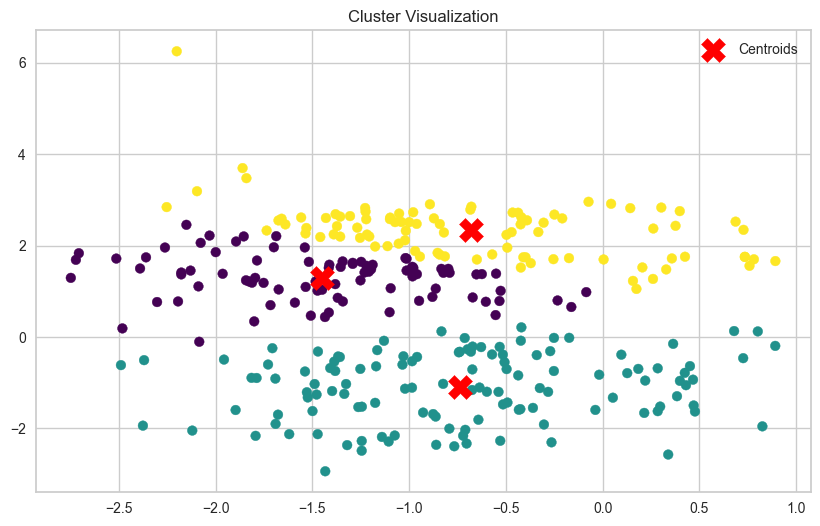

In [143]:
label_range = {2: 0.30, 3: 0.45, 4: 0.55, 5: 0.35, 6: 0.25, 7: 0.20, 8: 0.15, 9: 0.10}

optimal_k_example = max(label_range, key=label_range.get)

kmeans = KMeans(n_clusters=optimal_k, random_state=0)
cluster_labels = kmeans.fit_predict(X_test_pca)

plt.figure(figsize=(10, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=cluster_labels, cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title(f'Cluster Visualization')
plt.legend()
plt.show()

# Model training

In [144]:
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=0)
X_train['cluster_label'] = kmeans.fit_predict(X_train_pca)
X_test['cluster_label'] = kmeans.predict(X_test_pca)

x_test = X_test
x_train = X_train

In [145]:
_ = setup(data=pd.concat([X_train, y_train], axis=1), target='output')

,Description,Value
0,Session id,4041
1,Target,output
2,Target type,Regression
3,Original data shape,"(993, 15)"
4,Transformed data shape,"(993, 15)"
5,Transformed train set shape,"(695, 15)"
6,Transformed test set shape,"(298, 15)"
7,Numeric features,14
8,Preprocess,True
9,Imputation type,simple


In [146]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
  
predicted = model.predict(x_test)
LogisticRegression_score = accuracy_score(y_test, predicted) * 100.0
print("Logistic Regression accuracy: %.2f%%" % LogisticRegression_score)

Logistic Regression accuracy: 77.23%


In [147]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)
  
predicted = model.predict(x_test)
SVC_score = accuracy_score(y_test, predicted) * 100.0
print("SVC accuracy: %.2f%%" % SVC_score)

SVC accuracy: 58.09%


In [148]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(x_train, y_train)
  
predicted = model.predict(x_test)
GradientBoostingClassifier_score = accuracy_score(y_test, predicted) * 100.0
print("GradientBoosting Classifier accuracy: %.2f%%" % GradientBoostingClassifier_score)

GradientBoosting Classifier accuracy: 91.09%


In [149]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(x_train, y_train)

predicted = model.predict(x_test)
RandomForestClassifier_score = accuracy_score(y_test, predicted) * 100.0
print("Random Forest accuracy: %.2f%%" % RandomForestClassifier_score)

Random Forest accuracy: 96.04%


In [150]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(x_train, y_train)

predicted = model.predict(x_test)
DecisionTreeClassifier_score = accuracy_score(y_test, predicted) * 100.0
print("Decision Tree Classifier accuracy: %.2f%%" % DecisionTreeClassifier_score)

Decision Tree Classifier accuracy: 93.73%


In [151]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=11, p=2)

model.fit(x_train, y_train)

predicted = model.predict(x_test)
KNeighborsClassifier_score = accuracy_score(y_test, predicted) * 100.0
print("KNeighbors Classifier accuracy: %.2f%%" % KNeighborsClassifier_score)

KNeighbors Classifier accuracy: 69.31%


In [152]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(x_train, y_train)

predicted = model.predict(x_test)
GaussianNB_score = accuracy_score(y_test, predicted) * 100.0
print("GaussianNB accuracy: %.2f%%" % GaussianNB_score)

GaussianNB accuracy: 72.28%


In [153]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()

model.fit(x_train, y_train)

predicted = model.predict(x_test)
AdaBoostClassifier_score = accuracy_score(y_test, predicted) * 100.0
print("AdaBoost Classifier accuracy: %.2f%%" % AdaBoostClassifier_score)

AdaBoost Classifier accuracy: 82.84%


In [154]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier()

model.fit(x_train, y_train)

predicted = model.predict(x_test)
MLPClassifier_score = accuracy_score(y_test, predicted) * 100.0
print("MLP Classifier accuracy: %.2f%%" % MLPClassifier_score)

MLP Classifier accuracy: 80.53%


In [155]:
import xgboost as xgb

model = xgb.XGBClassifier(objective='binary:logistic', random_state=2, learning_rate=0.4)

model.fit(x_train, y_train)

predicted = model.predict(x_test)
xgb_score = accuracy_score(y_test, predicted) * 100.0
print("XGB Accuracy: %.2f%%" % xgb_score)

XGB Accuracy: 96.04%


In [156]:
from sklearn import tree
# remark: maybe accruacy score seems not a good apporach to evaluate the accuracy of decision tree
model = tree.DecisionTreeClassifier(random_state=0)
model.fit(x_train, y_train)

predicted = model.predict(x_test)
dtc_score = accuracy_score(y_test, predicted) * 100.0
print("Decision TreeC Classifier Accuracy: %.2f%%" % dtc_score)

Decision TreeC Classifier Accuracy: 94.06%


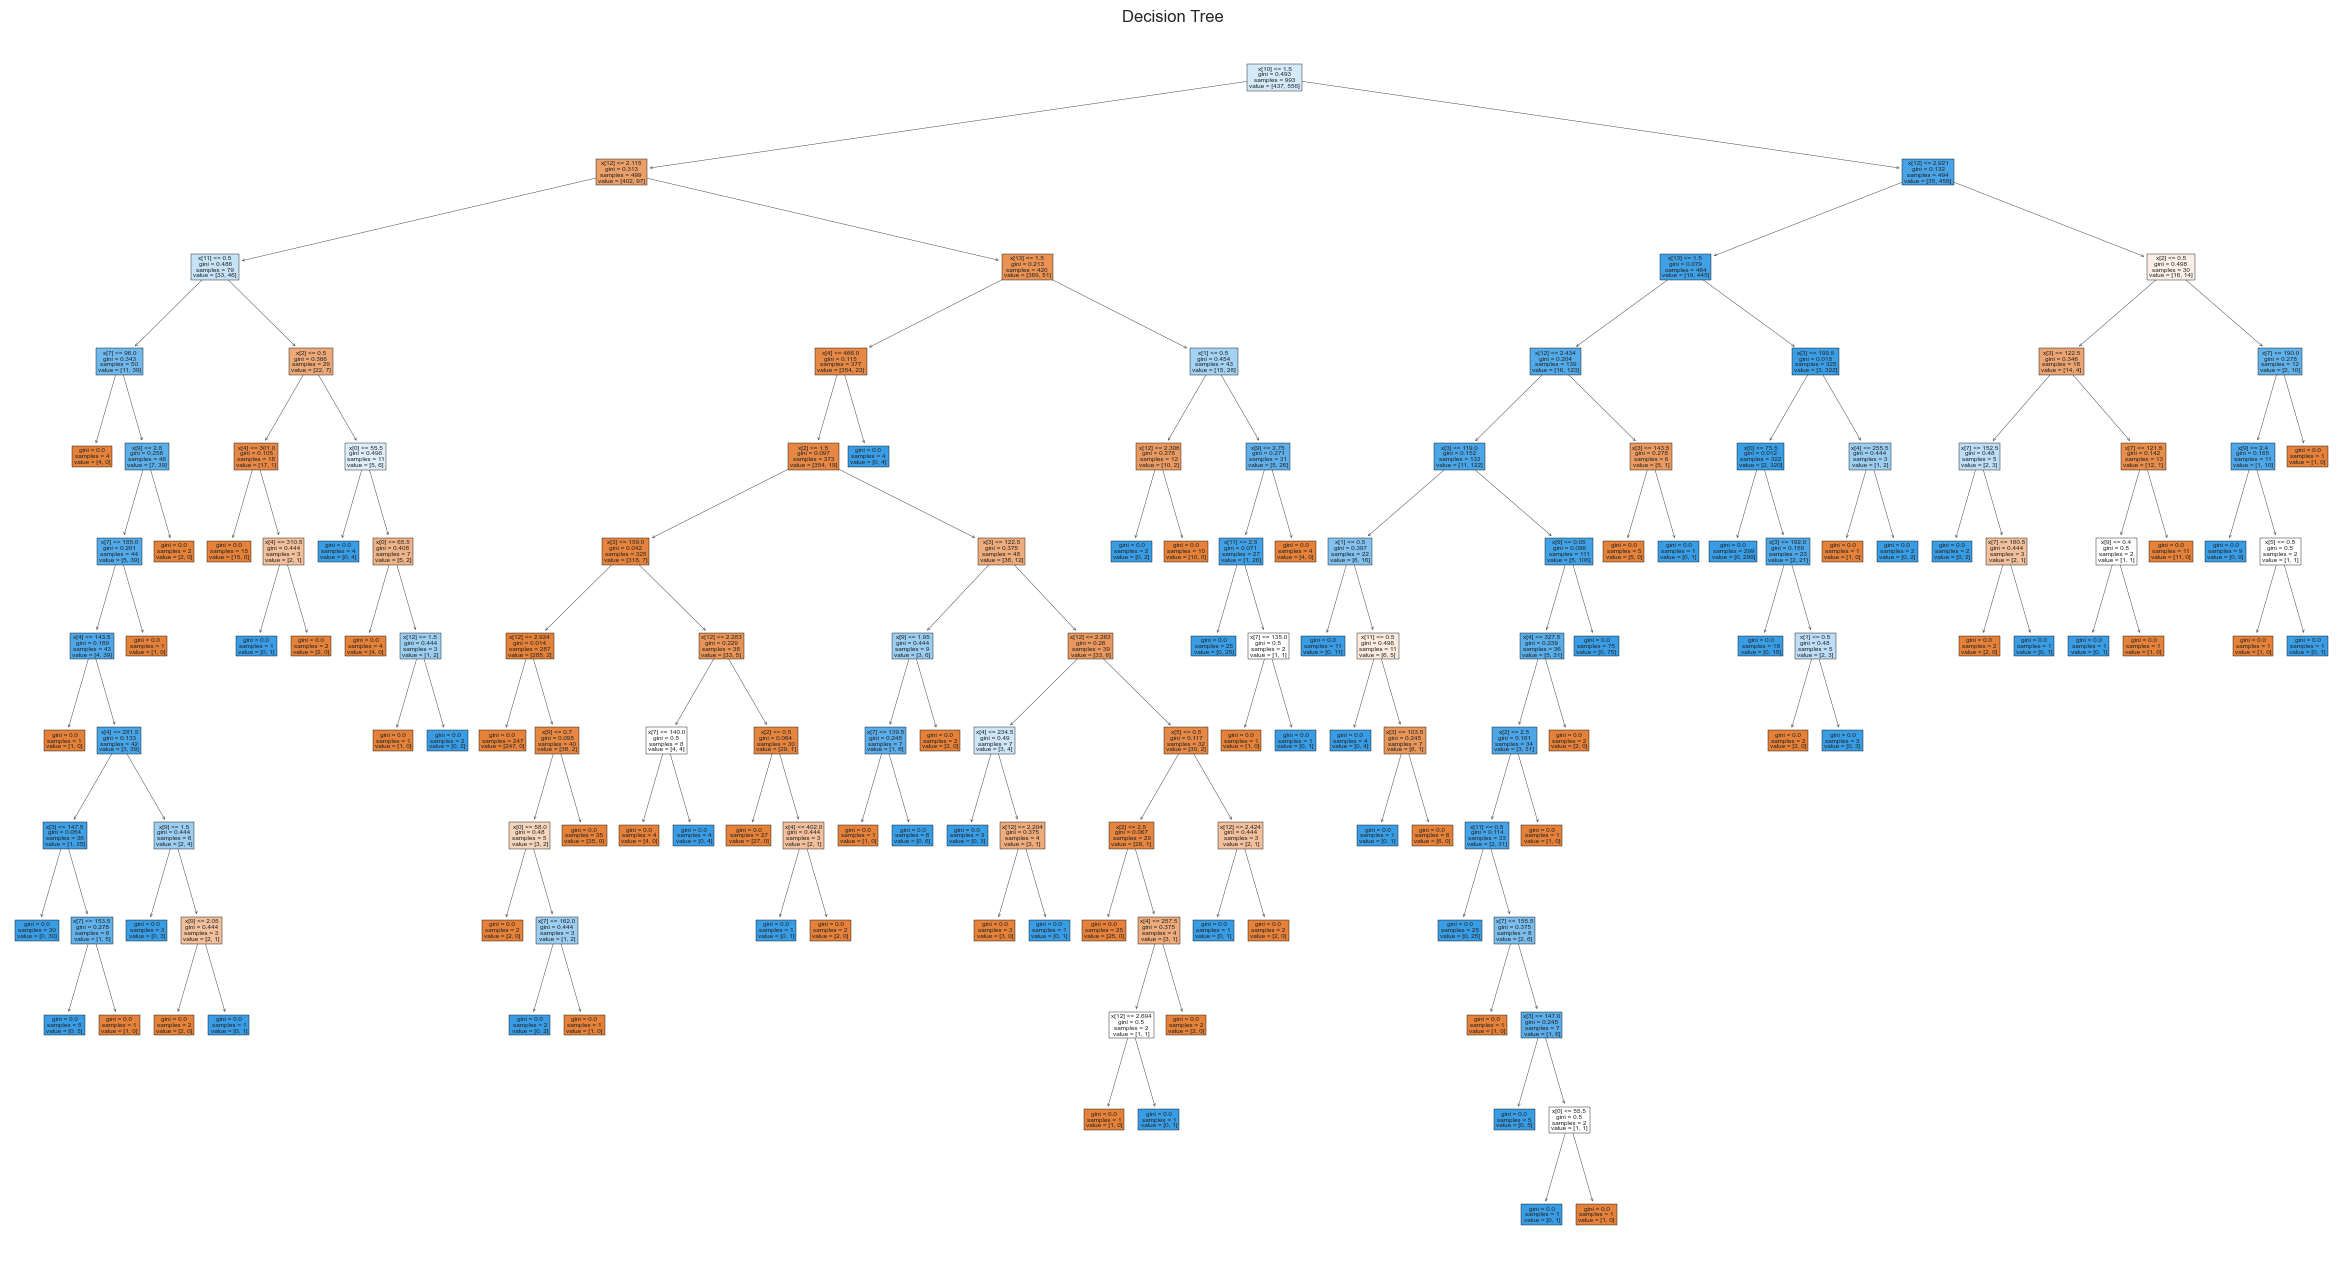

In [157]:
# decision tree visuliation
plt.figure(figsize=(30, 16))
tree.plot_tree(model, filled=True)
plt.title("Decision Tree")
plt.show()

In [158]:
import catboost
from catboost import CatBoostClassifier

cat_clf = CatBoostClassifier()
cat_clf.fit(X_train, y_train)

predicted = cat_clf.predict(x_test)
cat_score = accuracy_score(y_test, predicted) * 100.0
print("catboost Accuracy: %.2f%%" % cat_score)

Learning rate set to 0.010271
0:	learn: 0.6795874	total: 3.24ms	remaining: 3.23s
1:	learn: 0.6646220	total: 4.14ms	remaining: 2.07s
2:	learn: 0.6518807	total: 5.02ms	remaining: 1.67s
3:	learn: 0.6395687	total: 5.9ms	remaining: 1.47s
4:	learn: 0.6281739	total: 6.78ms	remaining: 1.35s
5:	learn: 0.6157259	total: 9.15ms	remaining: 1.52s
6:	learn: 0.6034063	total: 10ms	remaining: 1.42s
7:	learn: 0.5911571	total: 11.4ms	remaining: 1.42s
8:	learn: 0.5802322	total: 12.4ms	remaining: 1.36s
9:	learn: 0.5700803	total: 13.3ms	remaining: 1.31s
10:	learn: 0.5613335	total: 14.3ms	remaining: 1.28s
11:	learn: 0.5529053	total: 15.5ms	remaining: 1.28s
12:	learn: 0.5438119	total: 16.3ms	remaining: 1.24s
13:	learn: 0.5342731	total: 22.9ms	remaining: 1.61s
14:	learn: 0.5244697	total: 25.1ms	remaining: 1.64s
15:	learn: 0.5153328	total: 26.2ms	remaining: 1.61s
16:	learn: 0.5063424	total: 27.7ms	remaining: 1.6s
17:	learn: 0.4965592	total: 28.8ms	remaining: 1.57s
18:	learn: 0.4876201	total: 31ms	remaining: 1.6s

In [159]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score

model = ExtraTreesRegressor(random_state=0)
model.fit(X_train, y_train)
predicted = model.predict(x_test)
etr_score = r2_score(y_test, predicted) * 100
print("Extra Trees Regressor Accuracy: %.2f%%" % etr_score)

Extra Trees Regressor Accuracy: 86.46%


# Evaluation

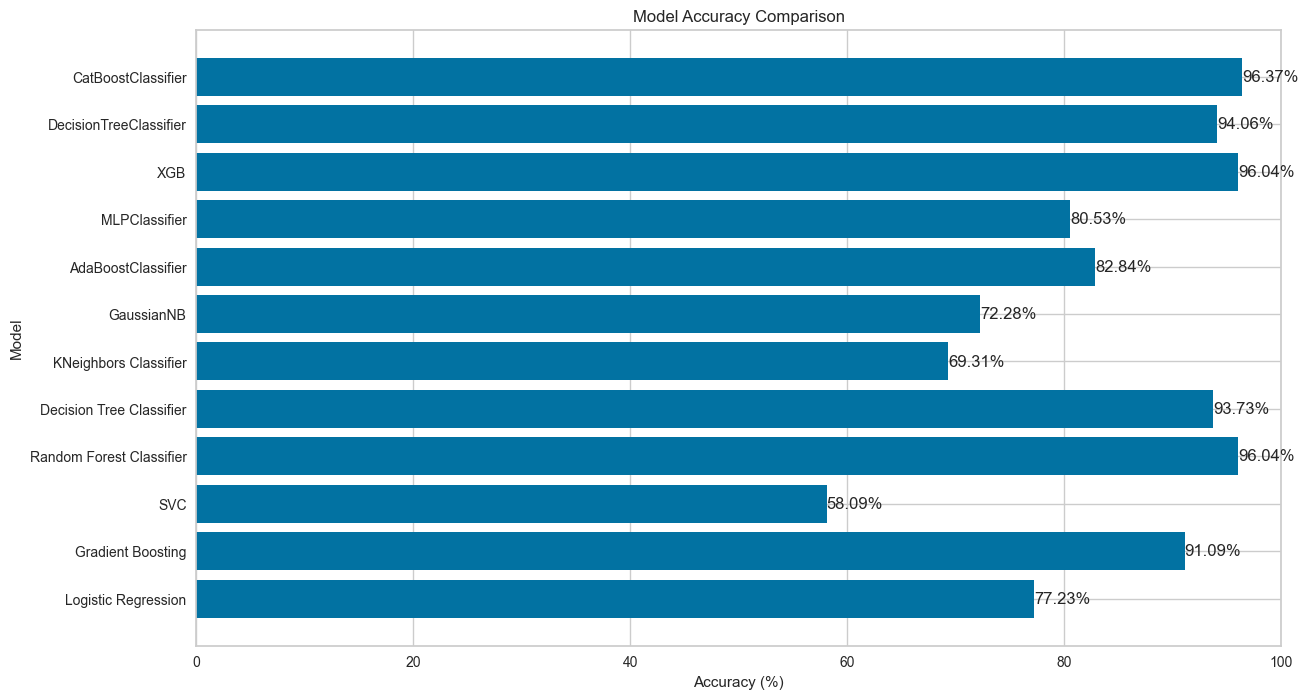

In [160]:
models = ['Logistic Regression', 'Gradient Boosting', 'SVC', 'Random Forest Classifier', 
          'Decision Tree Classifier', 'KNeighbors Classifier', 'GaussianNB', 'AdaBoostClassifier',
         'MLPClassifier', 'XGB', 'DecisionTreeClassifier', 'CatBoostClassifier']

scores = [LogisticRegression_score, GradientBoostingClassifier_score, SVC_score, 
          RandomForestClassifier_score, DecisionTreeClassifier_score, KNeighborsClassifier_score,
         GaussianNB_score, AdaBoostClassifier_score, MLPClassifier_score, xgb_score, dtc_score, cat_score]

plt.figure(figsize=(14, 8))  
plt.barh(models, scores)  
plt.ylabel('Model')
plt.xlabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.xlim([0, 100])  
for i in range(len(scores)):
    plt.text(scores[i], i, f'{scores[i]:.2f}%', va='center')  

plt.show()

In [161]:
xgb_clf = xgb.XGBClassifier(random_state=0)
rf_clf = RandomForestClassifier(random_state=0)
gb_clf = GradientBoostingClassifier(learning_rate=0.5, max_depth=10, max_features=0.7500000000000001, min_samples_leaf=14, min_samples_split=14, n_estimators=100, subsample=0.9500000000000001)
#cat_clf = CatBoostClassifier()

xgb_clf.fit(x_train, y_train)
rf_clf.fit(x_train, y_train)
gb_clf.fit(x_train, y_train)
#cat_clf.fit(X_train, y_train)

xgb_pred = xgb_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
gb_pred = gb_clf.predict(X_test)
cat_clf_pred = cat_clf.predict(X_test)

combined_pred = []
for i in range(len(X_test)):
    votes = [xgb_pred[i], rf_pred[i], gb_pred[i], cat_clf_pred[i]]
    combined_pred.append(max(set(votes), key=votes.count))

combined_accuracy = accuracy_score(y_test, combined_pred) * 100
#print('Combined Model Accuracy: %.2f'% combined_accuracy)
print(f'Combined Model Accuracy: {combined_accuracy}%')

Combined Model Accuracy: 96.36963696369637%


In [162]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.1238,0.0488,0.2167,0.7994,0.1517,0.1137,0.2210
et,Extra Trees Regressor,0.1087,0.0525,0.2239,0.7843,0.1566,0.0982,0.0400
gbr,Gradient Boosting Regressor,0.1413,0.0549,0.2304,0.7738,0.1620,0.1290,0.0250
rf,Random Forest Regressor,0.1164,0.0562,0.2348,0.7685,0.1634,0.1063,0.0440
lightgbm,Light Gradient Boosting Machine,0.1475,0.0574,0.2356,0.7639,0.1659,0.1354,0.2620
xgboost,Extreme Gradient Boosting,0.1115,0.0610,0.2436,0.7488,0.1681,0.1009,0.0150
ada,AdaBoost Regressor,0.1851,0.0767,0.2746,0.6847,0.1946,0.1651,0.0060
ridge,Ridge Regression,0.2176,0.0836,0.2878,0.6564,0.1988,0.2180,0.0030
lr,Linear Regression,0.2172,0.0836,0.2878,0.6563,0.1987,0.2177,0.0090
br,Bayesian Ridge,0.2190,0.0837,0.2880,0.6560,0.1991,0.2193,0.0030


<!-- from tpot import TPOTClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()

tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2)
tpot.fit(x_train, y_train)
print("TPOT Accuracy:", tpot.score(x_train, y_train)) -->